In [1]:
# Samantha Yin 
# 1004194259
# Assignment 2

#install library
%pip install bioinfokit

# import the library

# Import the numpy library
import numpy as np  
# Import the pandas library
import pandas as pd
# Import the matplotlib.pyplot library for data visualization
import matplotlib.pyplot as plt
# Import the seaborn
import seaborn as sns
# Import scipy.stats
import scipy.stats as stats
# Import statsmodels.api
import statsmodels.api as sm
# Import ols
from statsmodels.formula.api import ols
# Import stat from bioinfokit.analys
from bioinfokit.analys import stat
# Import pairwise_tukeyhsd and MultiComparison from statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

  Using cached bioinfokit-2.1.3-py3-none-any.whl
  Using cached matplotlib_venn-0.11.10-py3-none-any.whl.metadata (6.4 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached adjustText-1.0.4-py3-none-any.whl.metadata (3.0 kB)
Using cached adjustText-1.0.4-py3-none-any.whl (11 kB)
Using cached matplotlib_venn-0.11.10-py3-none-any.whl (33 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached textwrap3-0.9.2-py2.py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
## import the data 

# load the dataset using pandas and store it in the varaible "data"
data = pd.read_excel('INF2178_A2_data.xlsx')
# call the first 5 rows for reference 
data.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [3]:
# Display the summary of statistics for each column
# with count, mean, sd, min, 25% percentile, median, 75% percentile, max, sd of the date and numerical columns
data.describe()

,_id,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,532.000000,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,307.005972,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,266.500000,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,532.000000,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,797.500000,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,1063.000000,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


In [4]:
#Display the info of data to understand the data type and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


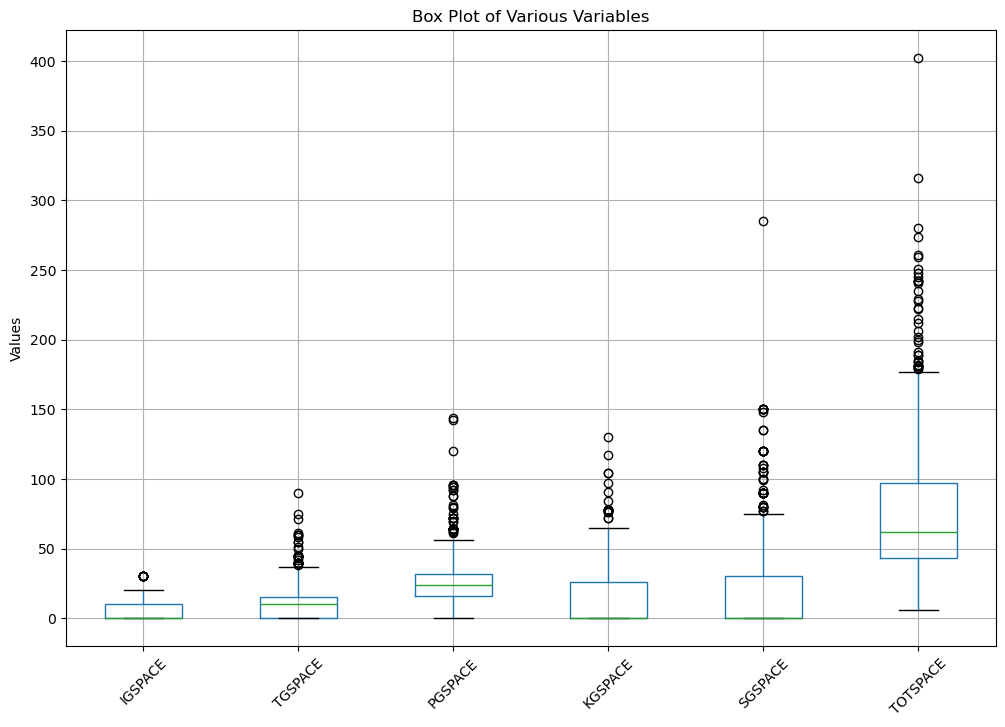

In [5]:
# Boxplot for IGSPACE, TGSPACE, PGSPACE, KGSPACE, SGSPACE, TOTSPACE
# set up the plot with specific size
plt.figure(figsize=(12, 8))

# Creating a list of the columns to plot
columns_to_plot = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']

# Plotting the box plots
# Plot it for the columns above
data.boxplot(column=columns_to_plot)
# Rotating x-axis labels
plt.xticks(rotation=45)
# give the boxplot a title
plt.title('Box Plot of Various Variables')
# Label the y-axis
plt.ylabel('Values')
# show the plot
plt.show()

In [6]:
# One-way ANOVA
# fit the model Ordinary Least Squares (OLS) model
model1 = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()

# Fitting the one-way ANOVA model
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# show the ANOVA table
anova_table1

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [7]:
# ANOVA table
# Initialize an instance of the stat
res = stat()

# Perform ANOVA using the anova_stat with 'TOTSPACE' as the dependent variable and AUSPICE as independent variable
res.anova_stat(df=data, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
#Return the result
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


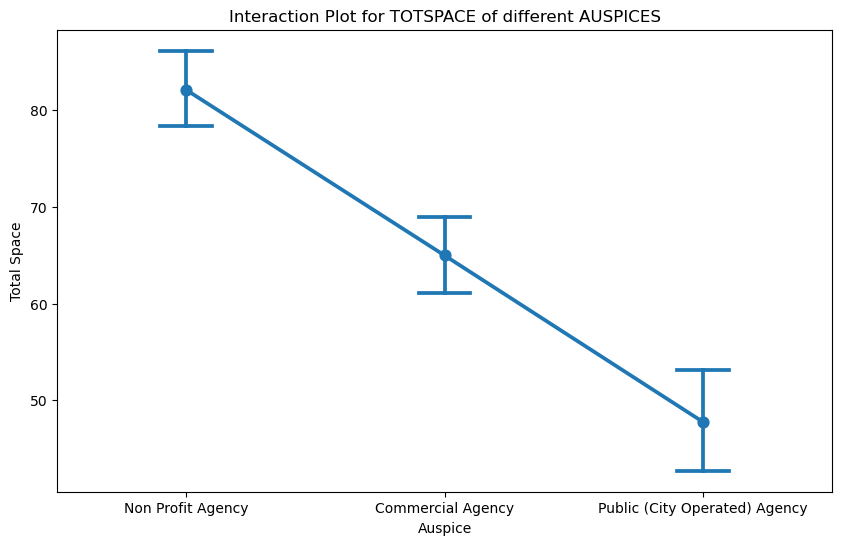

In [8]:
# Create interaction plot for 'AUSPICE' and 'TOTSPACE'
# set up the plot with specific size
plt.figure(figsize=(10, 6))
# Title and labels for the data
sns.pointplot(x='AUSPICE', y='TOTSPACE', data=data, capsize=.2)
plt.title('Interaction Plot for TOTSPACE of different AUSPICES')   #Title
plt.xlabel('Auspice')  # x-axis label
plt.ylabel('Total Space')  # y-axis label
plt.show()

In [9]:
# Perform Post-hoc HSD test 
tukey1 = pairwise_tukeyhsd(endog=data['TOTSPACE'],     # Response variable
                          groups=data['AUSPICE'])             # Group variable

# Show the results
tukey1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency,Non Profit Agency,17.1194,0.0,9.7037,24.5351,True
Commercial Agency,Public (City Operated) Agency,-17.2152,0.0779,-35.8832,1.4528,False
Non Profit Agency,Public (City Operated) Agency,-34.3346,0.0,-52.4448,-16.2244,True


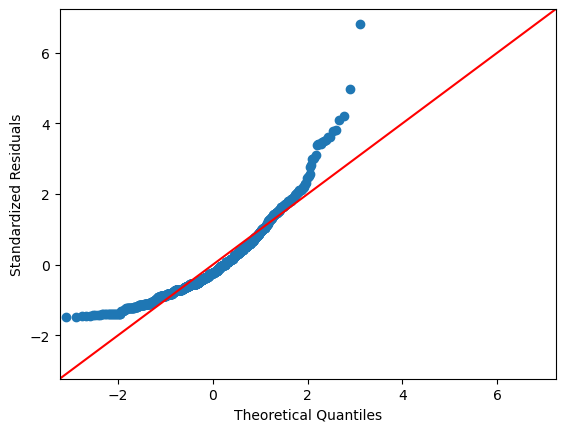

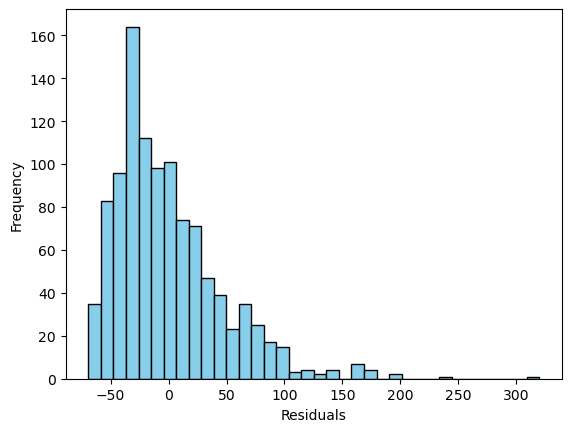

ShapiroResult(statistic=0.901775598526001, pvalue=1.4964898448030214e-25)


In [10]:
# Checking Assumptions for One-way - Normality 

# get the standardized residuals
anova_std_residuals1 = model1.get_influence().resid_studentized_internal

# draw the qq plot to check the normality
sm.qqplot(anova_std_residuals1, line='45')
plt.xlabel("Theoretical Quantiles")     #x-axis label
plt.ylabel("Standardized Residuals")     #y-axis label
plt.show()

# Plot the histogram to visualize the residuals
plt.hist(model1.resid, bins='auto', color='skyblue', edgecolor='black', histtype='bar', ec='k')
plt.xlabel("Residuals")     #x-axis label
plt.ylabel('Frequency')     #y-axis label
plt.show()

# Perform the Shapiro Wilk test on model 1
shapiro1 = stats.shapiro(model1.resid)
# return the result of the test
print(shapiro1)

                 Parameter   Value
0      Test statistics (W)  9.1994
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0001


<Figure size 1200x600 with 0 Axes>

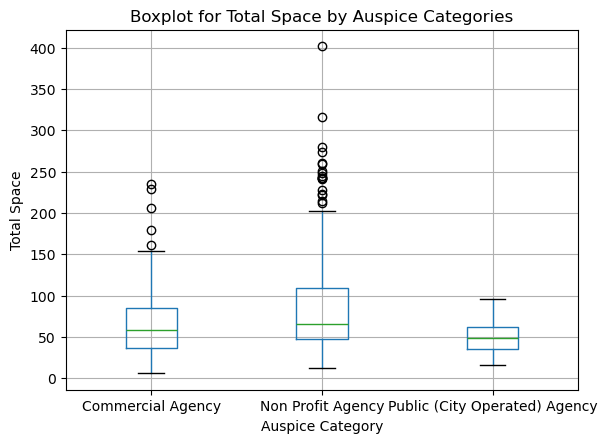

In [11]:
# Checking Assumptions for One-way - Homogeneity of Variances

# by examining the above test, the data is not normally distributed
# Perform Levene's test since the sample is not normally distributed
res.levene(df=data, res_var='TOTSPACE', xfac_var='AUSPICE')
# return the result of the test
print(res.levene_summary)

# Plot the boxplot for 'TOTSPACE' grouped by 'AUSPICE' for the three categories
# Create the boxplot
plt.figure(figsize=(12, 6))
data.boxplot(column='TOTSPACE',    # the column of data
             by='AUSPICE')      # the grouping variable
plt.title('Boxplot for Total Space by Auspice Categories')  # give the boxplot a title
plt.xlabel('Auspice Category')    # Label the x-axis
plt.ylabel('Total Space')    # Label the y-axis
plt.suptitle('')  # Remove the automatic title
plt.show()

In [12]:
# Two-way ANOVA
# For two-way ANOVA, melt the Data for analysis
# consolidate the multiple space variables into a single column
data_melt = pd.melt(data, id_vars=['AUSPICE'], value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE'])

# Rename the columns
data_melt.columns = ['AUSPICE', 'space_type', 'space']

# Display the first 10 rows
data_melt.head(10)

,AUSPICE,space_type,space
0,Non Profit Agency,IGSPACE,0
1,Non Profit Agency,IGSPACE,0
2,Non Profit Agency,IGSPACE,0
3,Non Profit Agency,IGSPACE,10
4,Non Profit Agency,IGSPACE,0
5,Non Profit Agency,IGSPACE,10
6,Non Profit Agency,IGSPACE,10
7,Commercial Agency,IGSPACE,0
8,Non Profit Agency,IGSPACE,0
9,Non Profit Agency,IGSPACE,0


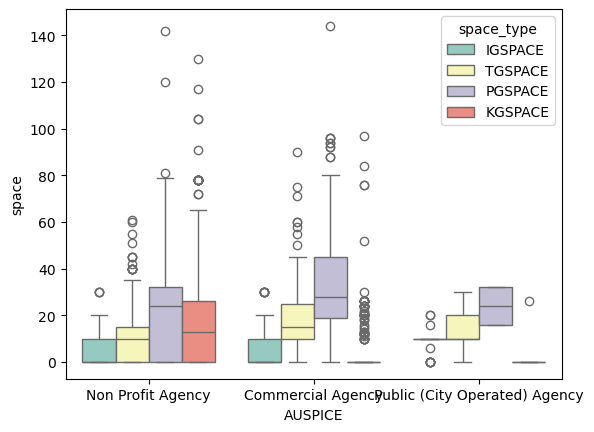

In [13]:
# Visual inspection of interaction effects using boxplot
# Use 'AUSPICE' and different space_type
sns.boxplot(x="AUSPICE", y="space", hue="space_type", data=data_melt, palette="Set3")
plt.show()

/opt/conda/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x7fb1585fd3a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


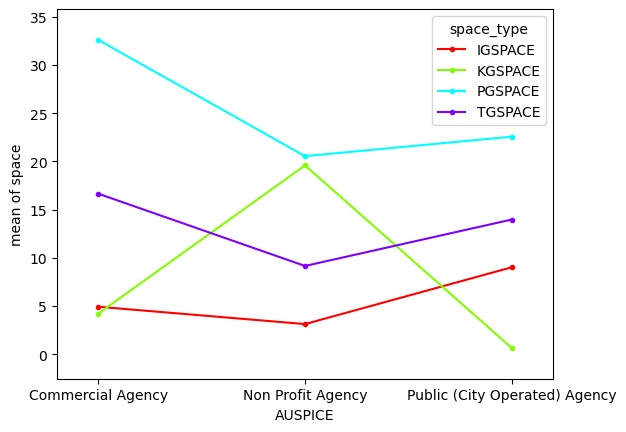

In [14]:
# Create Interation Plot

# import interaction_plot function
from statsmodels.graphics.factorplots import interaction_plot
# Create the interaction plot using AUSPICE, space_type and space
fig = interaction_plot(x=data_melt['AUSPICE'], trace=data_melt['space_type'], response=data_melt['space'])
plt.show()

In [15]:
# two-way ANOVA

# Perform a two-way ANOVA to assess the effect of 'AUSPICE' and 'space_type' on 'space'
model2 = ols('space ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)', data=data_melt).fit()
# Generate the ANOVA table
anova2 = sm.stats.anova_lm(model2, typ=2)
#print the result
anova2

,sum_sq,df,F,PR(>F)
C(AUSPICE),2579.559942,2.0,6.068324,2.335205e-03
C(space_type),225526.026341,3.0,353.694699,5.361247e-205
C(AUSPICE):C(space_type),103362.930191,6.0,81.052553,2.559322e-96
Residual,901182.437430,4240.0,NaN,NaN


In [17]:
# ANOVA table
# Initialize an instance of the stat
res = stat()
# Perform an ANOVA test with the specified model and store the results
res.anova_stat(df=data_melt, 
               res_var='space', anova_model='space ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)')
# return the result
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,2579.559942,1289.779971,6.068324,2.335205e-03
C(space_type),3.0,225526.026341,75175.342114,353.694699,5.361247e-205
C(AUSPICE):C(space_type),6.0,103362.930191,17227.155032,81.052553,2.559322e-96
Residual,4240.0,901182.437430,212.543028,NaN,NaN


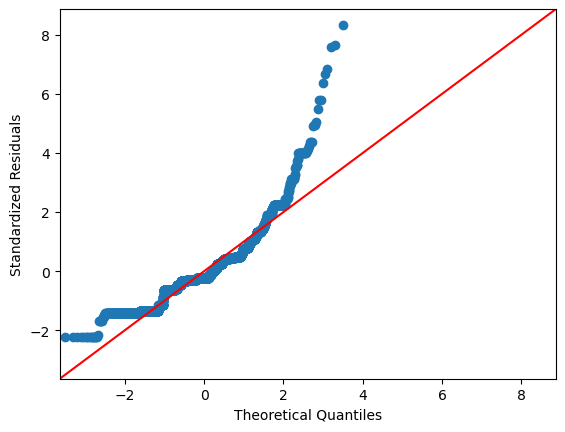

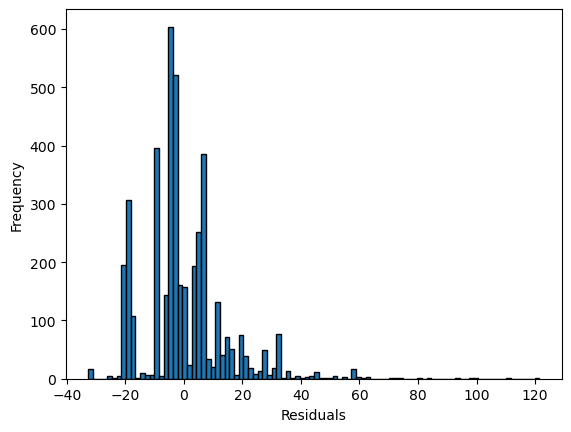

ShapiroResult(statistic=0.8896962404251099, pvalue=0.0)


In [18]:
# Checking Assumptions for Two-way - Normality 

# After fitting the ANOVA model, obtain the standardized residuals
anova_std_residuals2 = model2.get_influence().resid_studentized_internal

# Q-Q plot to check the normality
sm.qqplot(anova_std_residuals2, line='45')
plt.xlabel("Theoretical Quantiles")     #x-axis label
plt.ylabel("Standardized Residuals")     #y-axis label
plt.show()

# Histogram of the residuals to visualize the residuals
plt.hist(model2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")     #x-axis label
plt.ylabel('Frequency')     #y-axis label
plt.show()

# Shapiro Wilk test on model 2
shapiro2 = stats.shapiro(model2.resid)
# return the result
print(shapiro2)

In [19]:
# Checking Assumptions for Two-way - Homogeneity of Variances

# by examining the above test, the data is not normally distributed
# Perform Levene's test since the sample is not normally distributed
res = stat()
res.levene(df=data_melt, res_var='space', xfac_var=['AUSPICE', 'space_type'])
# return the result of the test
res.levene_summary

# Boxplot Above

,Parameter,Value
0,Test statistics (W),98.1543
1,Degrees of freedom (Df),11.0000
2,p value,0.0000


In [20]:
# Conduct the Tukey's HSD test
# MultiComparison class with the response variable and the groups for comparison
mc = MultiComparison(data_melt['space'], data_melt['AUSPICE'] + data_melt['space_type'])
# alpha level of 0.05
tukey_result = mc.tukeyhsd(alpha=0.05)

# Print the summary
tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial AgencyIGSPACE,Commercial AgencyKGSPACE,-0.704,1.0,-4.4669,3.0588,False
Commercial AgencyIGSPACE,Commercial AgencyPGSPACE,27.6604,0.0,23.8976,31.4233,True
Commercial AgencyIGSPACE,Commercial AgencyTGSPACE,11.7165,0.0,7.9537,15.4793,True
Commercial AgencyIGSPACE,Non Profit AgencyIGSPACE,-1.7966,0.8019,-5.0078,1.4146,False
Commercial AgencyIGSPACE,Non Profit AgencyKGSPACE,14.6557,0.0,11.4445,17.867,True
Commercial AgencyIGSPACE,Non Profit AgencyPGSPACE,15.6117,0.0,12.4004,18.8229,True
Commercial AgencyIGSPACE,Non Profit AgencyTGSPACE,4.2276,0.001,1.0164,7.4388,True
Commercial AgencyIGSPACE,Public (City Operated) AgencyIGSPACE,4.0911,0.8883,-3.9928,12.1749,False
Commercial AgencyIGSPACE,Public (City Operated) AgencyKGSPACE,-4.2679,0.8563,-12.3517,3.8159,False
Commercial AgencyIGSPACE,Public (City Operated) AgencyPGSPACE,17.6295,0.0,9.5457,25.7134,True
